In [1]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [21]:

df1=pd.read_csv('/Users/samruddhikale/Downloads/archive-2/KwhConsumptionBlower78_1.csv',
                names=['id','date','time','consumption'],
                parse_dates= {'datetime':['date','time']},
                index_col='id',
                header=0,
                date_format='%d %b %Y %H:%M:%S')

df2=pd.read_csv('/Users/samruddhikale/Downloads/archive-2/KwhConsumptionBlower78_2.csv',
                names=['id','date','time','consumption'],
                parse_dates= {'datetime':['date','time']},
                index_col='id',
                header=0,
                date_format='%d %b %Y %H:%M:%S')

df3=pd.read_csv('/Users/samruddhikale/Downloads/archive-2/KwhConsumptionBlower78_3.csv',
                names=['id','date','time','consumption'],
                parse_dates= {'datetime':['date','time']},
                index_col='id',
                header=0,
                date_format='%d %b %Y %H:%M:%S')
            
        

This dataset featuring Consumption of Electrical Blower Machine with timeslots of around 10-15 min. this data is recorded with help of IoT device.
Energy Consumption is Measured between Current and Previous time stamp.
Null or less than 0.5 value of Energy Consumption means machine was of during respective time slot time .
above time series consumption is Stationary with time as KWH i.e Kilo Watt/Hour Capacity of Blower motor is fixed.

In [22]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df)

                datetime  consumption
0    2022-01-01 16:55:52        1.010
1    2022-01-01 21:45:29        0.908
2    2022-01-01 12:24:52        0.926
3    2022-01-01 04:07:36        0.928
4    2022-01-01 06:52:25        0.916
...                  ...          ...
3601 2022-02-28 22:01:52        1.020
3602 2022-02-28 08:54:15        0.948
3603 2022-02-28 06:26:48        0.912
3604 2022-02-28 03:21:12        1.064
3605 2022-02-28 18:38:23        0.976

[3606 rows x 2 columns]


In [23]:
df.head()

,datetime,consumption
0,2022-01-01 16:55:52,1.010
1,2022-01-01 21:45:29,0.908
2,2022-01-01 12:24:52,0.926
3,2022-01-01 04:07:36,0.928
4,2022-01-01 06:52:25,0.916


In [24]:
print(f"min date: {df['datetime'].min()}, max date: {df['datetime'].max()}")
print(f"range: {df['datetime'].max()-df['datetime'].min()}")

min date: 2022-01-01 00:22:28, max date: 2022-02-28 23:50:27
range: 58 days 23:27:59


In [25]:
#daily energy consumption
df.sort_values('datetime').rolling('1D',on='datetime').sum().head()

,datetime,consumption
43,2022-01-01 00:22:28,1.030
19,2022-01-01 00:42:33,1.934
25,2022-01-01 01:01:51,2.838
11,2022-01-01 01:41:48,4.688
29,2022-01-01 02:22:52,6.566


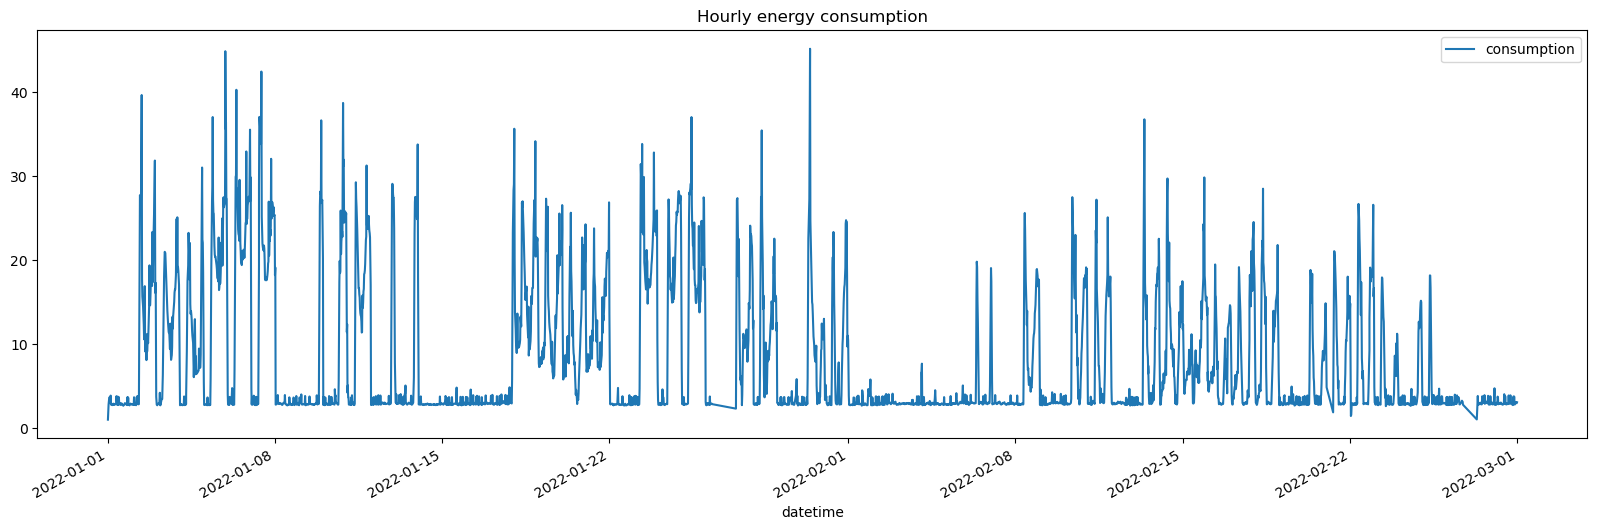

In [26]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'datetime' column
df.sort_values('datetime', inplace=True)

# Apply the rolling operation
df.rolling('1H', on='datetime').sum().loc[df['consumption'] > 0.5].plot(x='datetime', y='consumption', title="Hourly energy consumption", figsize=(20, 6))

# Show the plot
plt.show()


In [28]:
# Monthly total consumption and daily average consumption for a month
daily_cons = df.rolling('1d',on='datetime').sum()
daily_cons.groupby(daily_cons['datetime'].dt.month)['consumption'].apply(lambda x: {'sum':x.sum(),'average':x.mean(),'count':x.count()})

datetime         
1         sum        394803.692000
          average       212.488532
          count        1858.000000
2         sum        230673.132000
          average       131.964034
          count        1748.000000
Name: consumption, dtype: float64

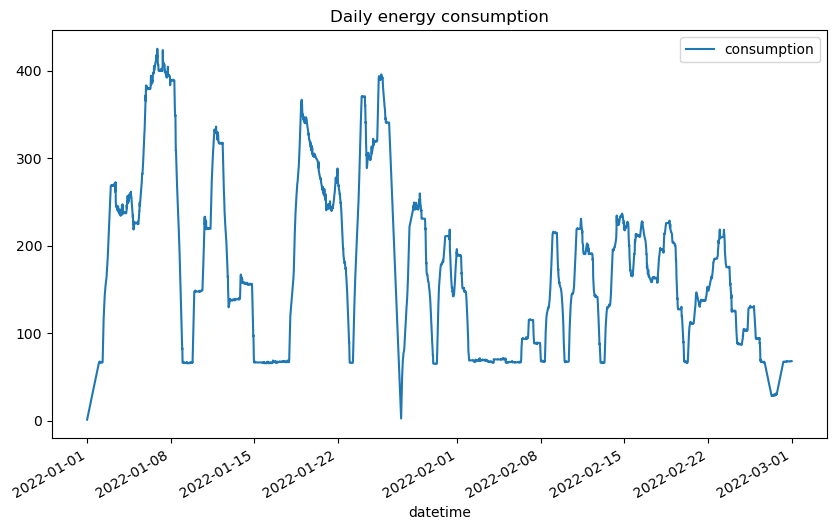

In [29]:


daily_cons.plot(x='datetime',y='consumption',title="Daily energy consumption",figsize=(10,6))
plt.show()

In [30]:
daily_cons.describe()

,datetime,consumption
count,3606,3606.000000
mean,2022-01-30 12:02:06.618691072,173.454471
min,2022-01-01 00:22:28,1.030000
25%,2022-01-15 11:04:40.249999872,81.581500
50%,2022-01-31 03:55:32.500000,159.762000
75%,2022-02-14 05:26:33.249999872,230.291500
max,2022-02-28 23:50:27,425.264000
std,NaN,96.549275


In [33]:
# Separating day and night consumption time
day_consumption = df.loc[(pd.Timestamp('06:00').time() <= df['datetime'].dt.time) & (df['datetime'].dt.time < pd.Timestamp('18:00').time()) & (df['consumption'] > 0.5)]

night_consumption = df.loc[list(set(df.index) - set(day_consumption.index))].sort_values('datetime')
night_consumption = night_consumption.loc[night_consumption['consumption'] > 0.5]


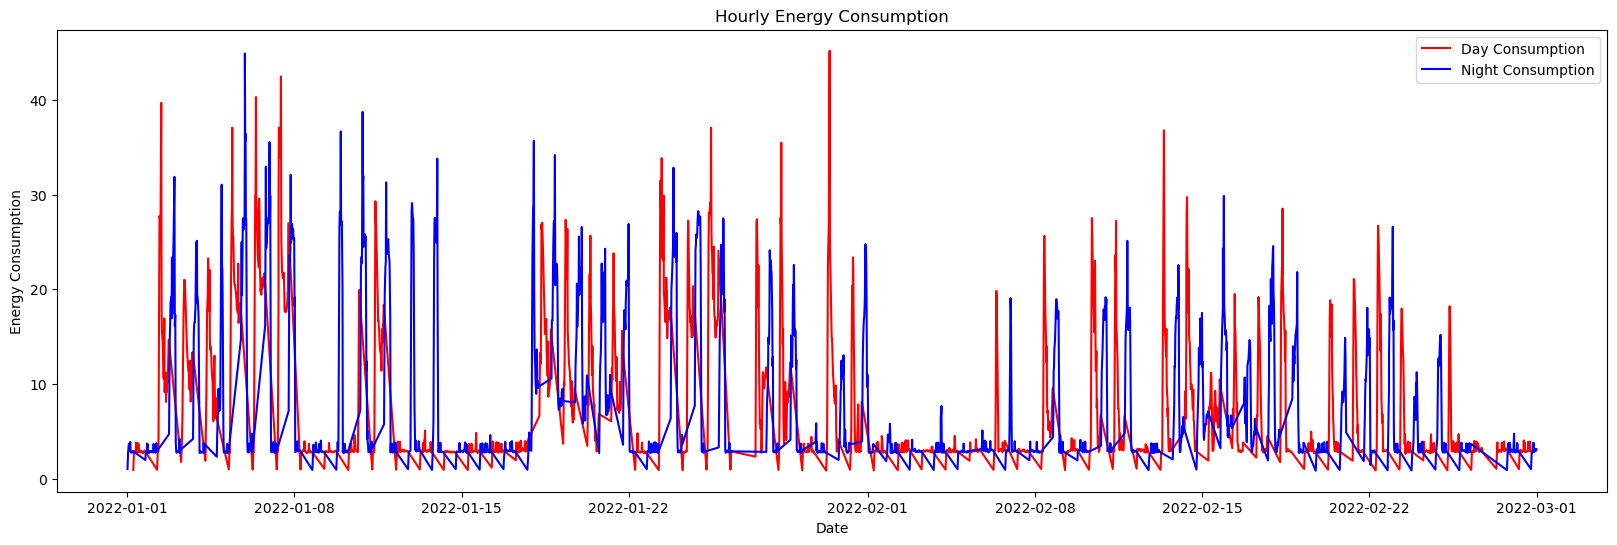

In [34]:
fig,ax= plt.subplots(1,1,figsize=(20,6))
day_hourly_cons = day_consumption.rolling('1H',on='datetime').sum()
night_hourly_cons = night_consumption.rolling('1H',on='datetime').sum()
ax.plot(day_hourly_cons['datetime'],day_hourly_cons['consumption'],'r-',label='Day Consumption')
ax.plot(night_hourly_cons['datetime'],night_hourly_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Hourly Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

In [35]:
daily_day_cons= day_consumption.rolling('1d',on='datetime').sum()
daily_night_cons= night_consumption.rolling('1d',on='datetime').sum()

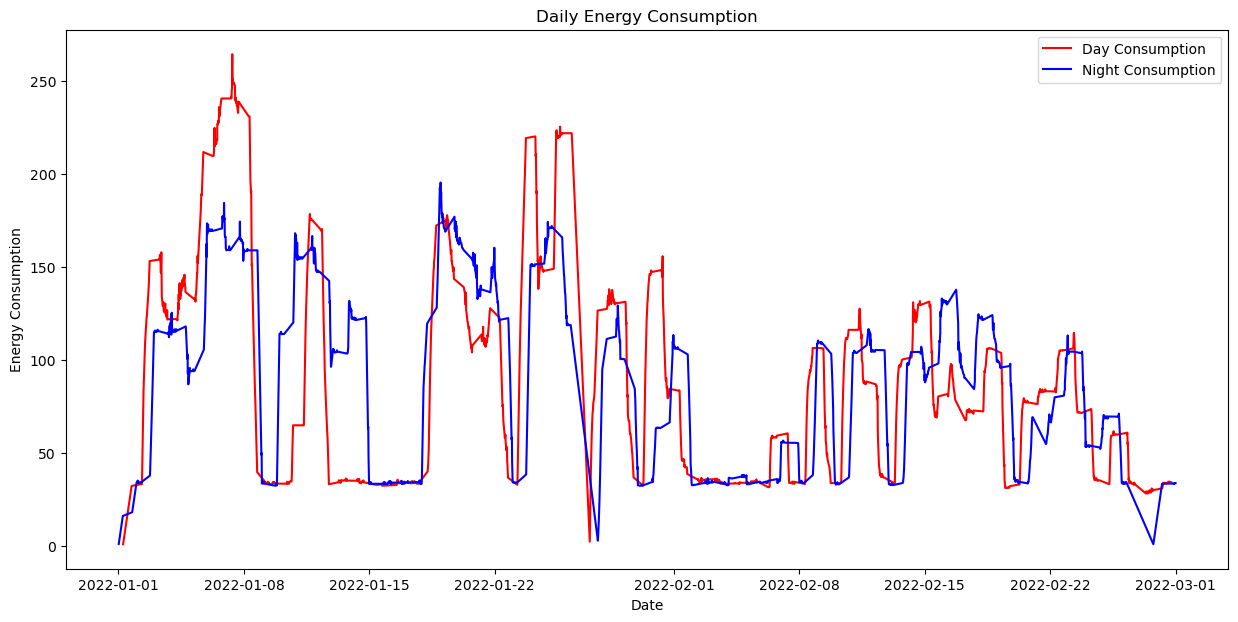

In [36]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(daily_day_cons['datetime'],daily_day_cons['consumption'],'r-',label='Day Consumption')
ax.plot(daily_night_cons['datetime'],daily_night_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Daily Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

# **TimeSeries Forecasting**

In [37]:
#Aggregating to day 

df_copy = df.set_index('datetime').sort_index()
df_copy = df_copy.resample('1D').sum()

**Additive Decompostion**

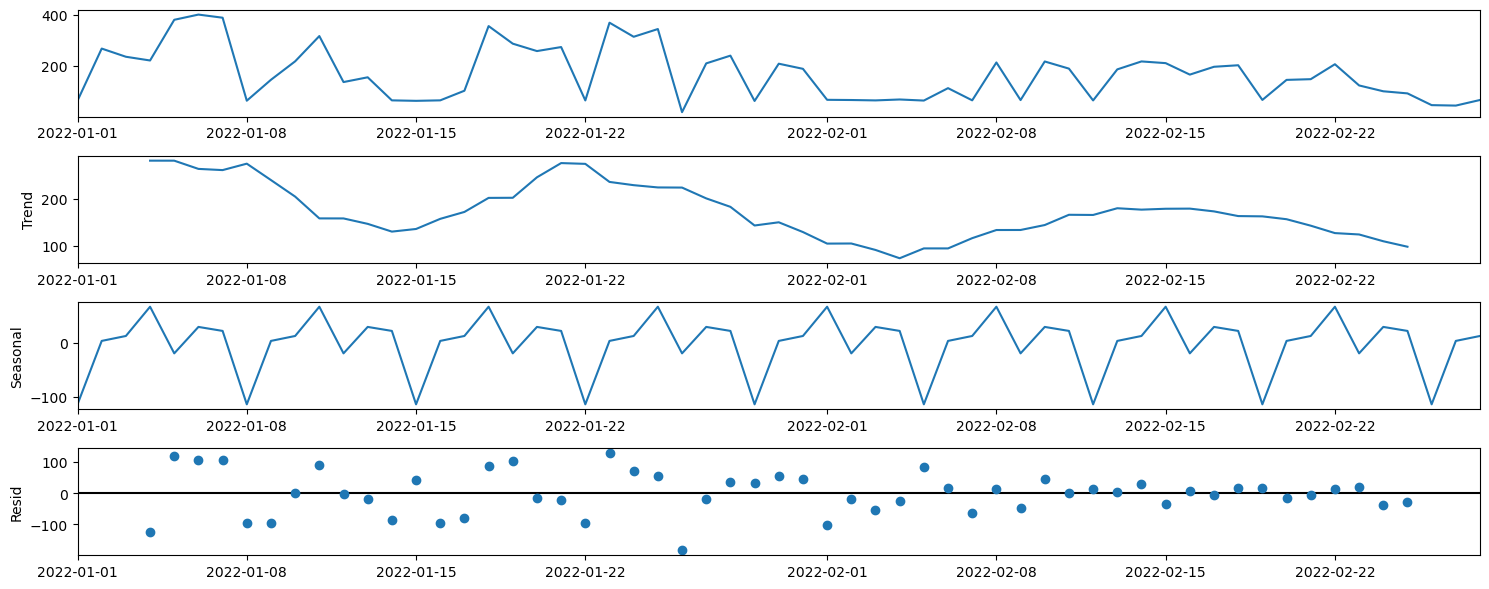

In [38]:
#TimeSeries Additive Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy,model='additive')
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

**Multiplicative Decomposition**

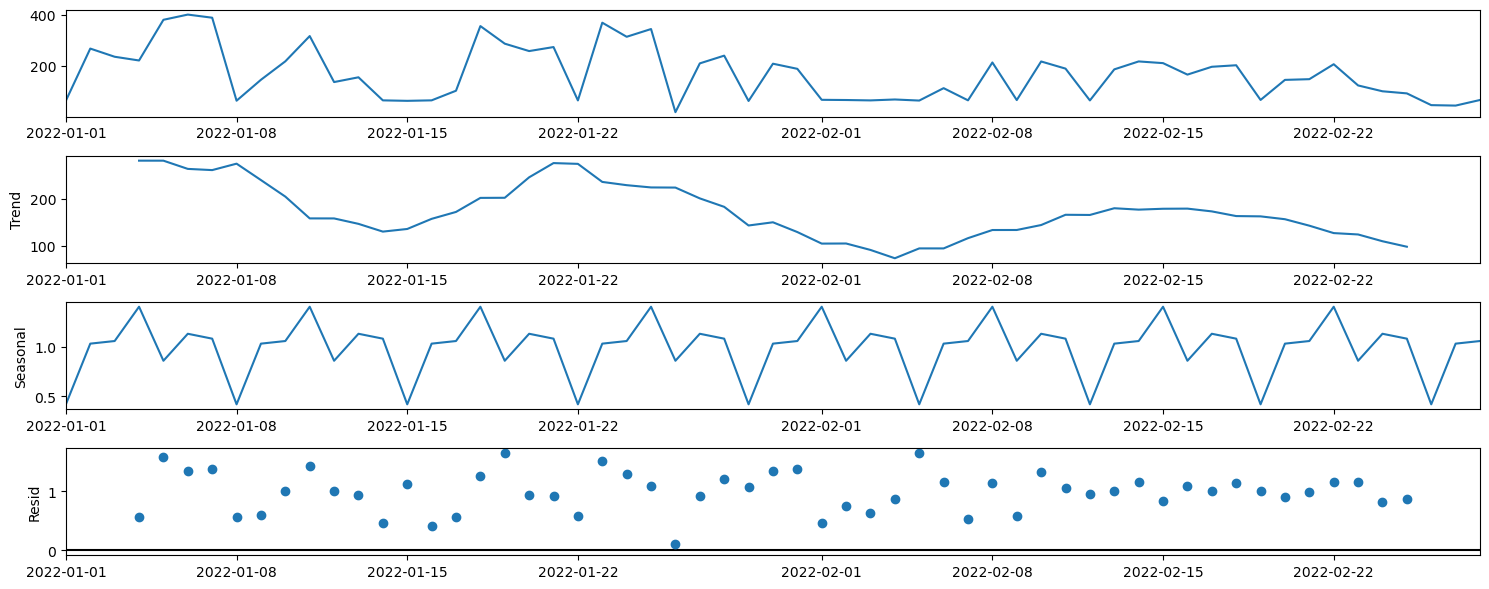

In [39]:
#TimeSeries Multiplitive Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy,model='multiplicative')
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

# AutoRegression Forecasting

In [43]:
#AutoRegression Forecasting

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_copy,lags=15)
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


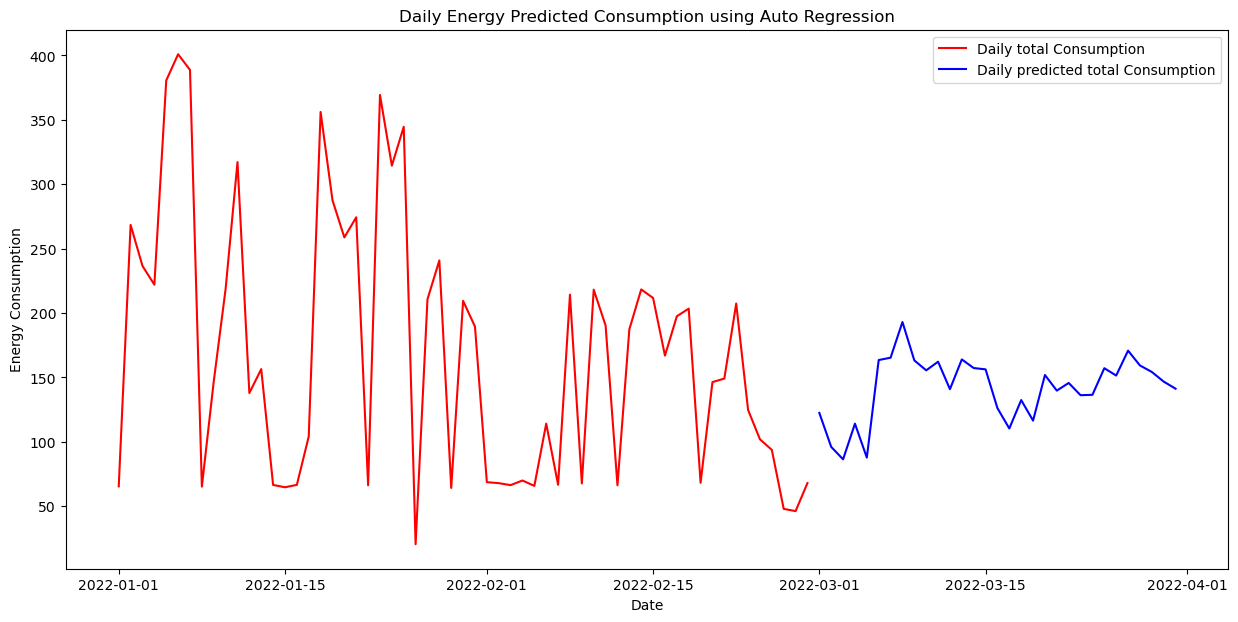

In [44]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using Auto Regression")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()